# Introduction

Est-ce que des budgets de films plus élevés conduisent à plus de revenus au box-office ? Découvrons s'il existe une relation en utilisant les données de budgets et de performances financières des films que j'ai extraites de [the-numbers.com](https://www.the-numbers.com/movie/budgets) le **1er mai 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Importation des Bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Présentation du Notebook

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Lecture des Données

In [3]:
data = pd.read_csv(r"C:\Users\Dany Anderson\Downloads\Seaborn+Linear+Regression+(complete)\cost_revenue_dirty.csv")

# Exploration et Nettoyage des Données

**Défi** : Répondez à ces questions sur le jeu de données :
1. Combien de lignes et de colonnes le jeu de données contient-il ?
2. Y a-t-il des valeurs NaN présentes ?
3. Y a-t-il des lignes dupliquées ?
4. Quels sont les types de données des colonnes ?

In [4]:
#1
data.shape 

(5391, 6)

In [5]:
#2
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [6]:
#3
data.duplicated().sum() # duplicated retourne un numpy array [True, False, False,...]

np.int64(0)

In [7]:
#4
data.info() # object ==> chaine de caractère

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Conversions des Types de Données

In [8]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


**Défi** : Convertissez les colonnes `USD_Production_Budget`, `USD_Worldwide_Gross` et `USD_Domestic_Gross` en format numérique en supprimant les signes `$` et les `,`. 
<br>
<br>
Notez que *domestic* dans ce contexte fait référence aux États-Unis.

In [9]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace('$','') # lst, int, cat, dt
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace(',','')

In [10]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Production_Budget'].dtype

dtype('int64')

In [12]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"


### Servons nous d'une boucle pour le reste

In [16]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])

**Défi** : Convertissez la colonne `Release_Date` en type Datetime de Pandas. 

In [17]:
data['Release_Date'] = pd.to_datetime(data.Release_Date)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [19]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Statistiques Descriptives

**Défi** : 

1. Quel est le budget de production moyen des films dans le jeu de données ?
2. Quel est le revenu brut mondial moyen des films ?
3. Quels sont les minimums pour les revenus mondiaux et domestiques ?
4. Les 25% de films du bas sont-ils réellement rentables ou perdent-ils de l'argent ?
5. Quels sont le budget de production le plus élevé et le revenu brut mondial le plus élevé d'un film ?
6. Combien de revenus les films au budget le plus bas et le plus élevé ont-ils générés ?

In [20]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Enquête sur les Films à Revenu Nul

**Défi** : Combien de films ont rapporté 0$ au niveau domestique (c'est-à-dire aux États-Unis) ? Quels sont les films au budget le plus élevé qui n'ont rien rapporté ?

In [21]:
condition = data.USD_Domestic_Gross == 0
data[condition]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


**Défi** : Combien de films ont rapporté 0$ dans le monde entier ? Quels sont les films au budget le plus élevé qui n'ont généré aucun revenu à l'international ?

In [22]:

 world_zero = data[data.USD_Worldwide_Gross == 0]

In [23]:
world_zero.sort_values(by='USD_Worldwide_Gross', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
140,3559,1968-10-10,Barbarella,9000000,0,0
78,5152,1957-04-13,12 Angry Men,340000,0,0
75,4455,1956-12-01,Diane,2660000,0,0
66,4705,1955-12-31,The King’s Thief,1577000,0,0


### Filtrage sur Conditions Multiples

In [24]:
# & ==> et
# | ==> ou

**Défi** : Utilisez la [fonction `.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) pour accomplir la même chose. Créez un sous-ensemble pour les sorties internationales qui ont généré des revenus mondiaux, mais aucun revenu aux États-Unis. 

Astuce : Cette fois, vous devrez utiliser le mot-clé `and`.

In [25]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Films Non Sortis

**Défi** :
* Identifiez quels films n'étaient pas encore sortis au moment de la collecte des données (1er mai 2018).
* Combien de films sont inclus dans le jeu de données qui n'ont pas encore eu l'occasion d'être projetés au box-office ? 
* Créez un autre DataFrame appelé data_clean qui n'inclut pas ces films. 

In [26]:
# Date de Collecte des Données
scrape_date = pd.Timestamp('2018-5-1') # Timestamp permet de convertir une chaine de caractere en date

In [27]:
future_films = data.Release_Date > scrape_date
data[future_films]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [28]:
data_clean = data.drop([index for index in range(5384,5391)])  # on peut egalement utiliser la methode drop() avec le nom du sous dataset
data_clean.shape

(5384, 6)

### Films qui Ont Perdu de l'Argent

**Défi** : 
Quel est le pourcentage de films dont les coûts de production ont dépassé les revenus bruts mondiaux ? 

In [29]:
condition = data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']
loss_money = data_clean[condition]
loss_money

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [30]:
pourcentage = loss_money.shape[0] *100 /data_clean.shape[0] # shape retourne un tuple
pourcentage 

37.27711738484398

# Seaborn pour la Visualisation de Données : Graphiques à Bulles

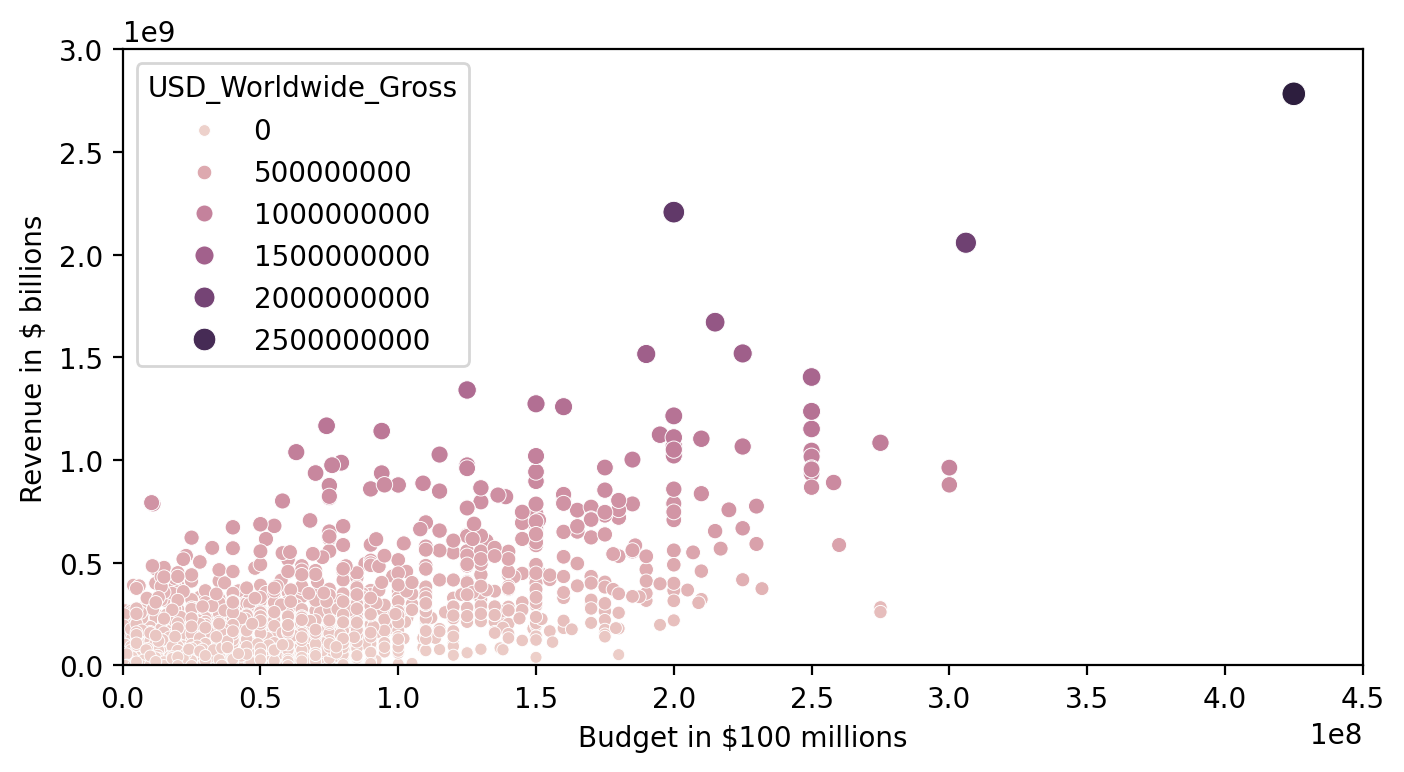

In [31]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # change colour
                     size='USD_Worldwide_Gross',) # change size of dot

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

### Tracer les Sorties de Films au Fil du Temps

**Défi** : Essayez de créer le graphique à bulles suivant :

<img src=https://i.imgur.com/8fUn9T6.png>



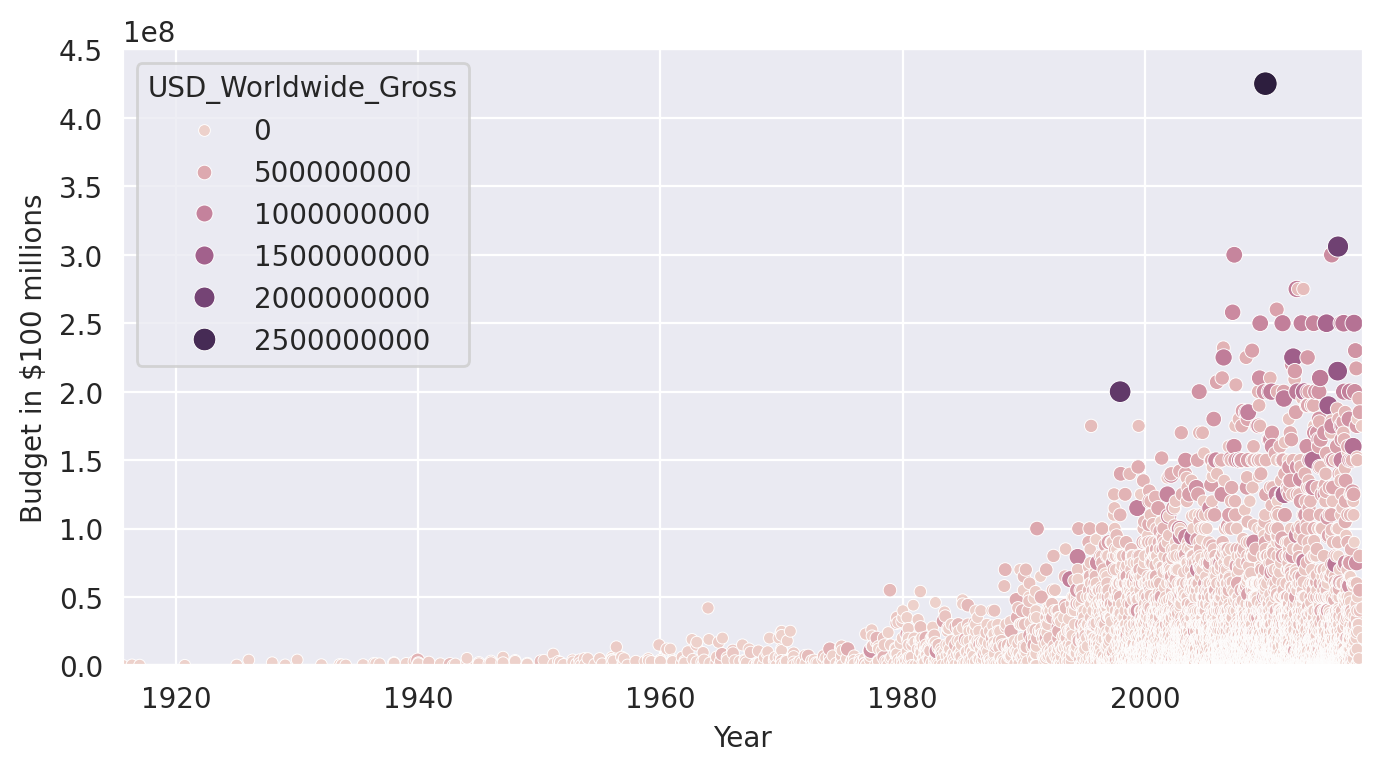

In [33]:
#Défi

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')


# Astuce pour Convertir les Années en Décennies

**Défi** : Créez une colonne dans `data_clean` qui contient la décennie de sortie. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Voici comment faire : 
1. Créez un [objet `DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) à partir de la colonne Release_Date. 
2. Récupérez toutes les années de l'objet `DatetimeIndex` en utilisant la propriété `.year`.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Utilisez la division entière `//` pour convertir les données d'année en décennies des films.
4. Ajoutez les décennies en tant que colonne `Decade` au DataFrame `data_clean`.

In [76]:
(1994//10)*10   # fonctionnement de la l'opérateur partie entière

1990

In [38]:
# essayons d'obtenir la colonne décennie
years = pd.DatetimeIndex(data_clean.Release_Date).year  # years est un numpy array du coup, on peut se servir de vectorization numpy
data_clean['Decade'] = (years//10) * 10
data_clean.head()    

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Séparer les Films "Anciens" (avant 1969) et "Nouveaux" (à partir des années 1970)

**Défi** : Créez deux nouveaux DataFrames : `old_films` et `new_films`
* `old_films` doit inclure tous les films avant 1969 (jusqu'en 1969 inclus)
* `new_films` doit inclure tous les films à partir de 1970
* Combien de films sont sortis avant 1970 ?
* Quel était le film le plus cher réalisé avant 1970 ?

In [39]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [44]:
old_films = data_clean[data_clean['Decade'] < 1970]
new_films = data_clean.drop(index = old_films.index)

In [45]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [46]:
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


# Graphiques de Régression avec Seaborn

In [96]:
old_films = data_clean[pd.Timestamp('1970-01-01') > data_clean.Release_Date]
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000


**Défi** : Utilisez `.regplot()` de Seaborn pour afficher le nuage de points et la ligne de régression linéaire pour `new_films`. 
<br>
<br>
Styler le graphique

* Mettez le graphique sur une grille `'darkgrid'`.
* Définissez des limites sur les axes pour qu'ils n'affichent pas de valeurs négatives.
* Étiquetez les axes du graphique "Revenus en milliards de \$" et "Budget en millions de \$".
* Fournissez des codes couleur HEX pour le graphique et la ligne de régression. Faites les points en bleu foncé (#2f4b7c) et la ligne en orange (#ff7c43).

Interpréter le graphique

* Nos points de données pour les nouveaux films s'alignent-ils mieux ou moins bien avec la régression linéaire que pour nos films plus anciens ?
* Approximativement, combien rapporterait un film avec un budget de 150 millions de dollars selon la ligne de régression ?

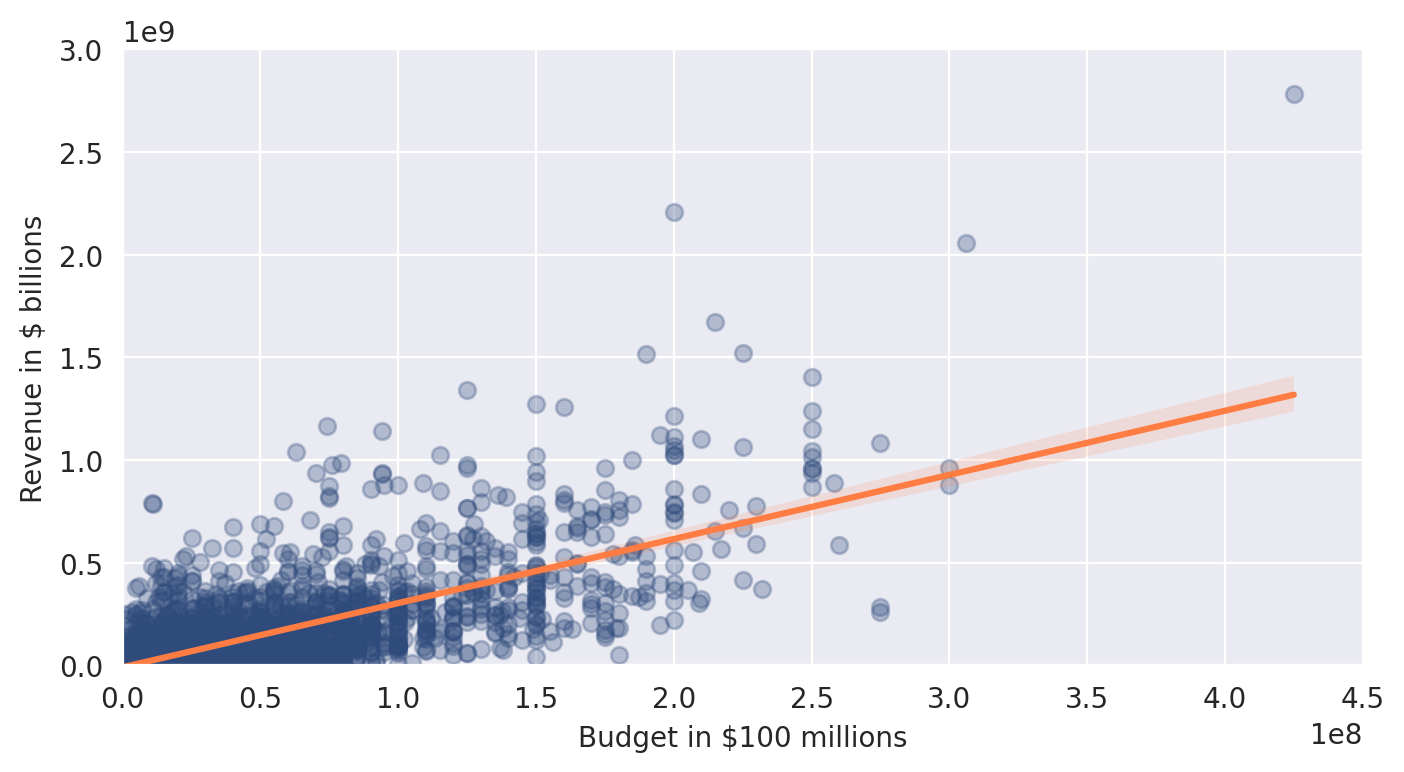

In [47]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Exécutez Votre Propre Régression avec scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [48]:
from sklearn.linear_model import LinearRegression

**Défi** : Exécutez une régression linéaire pour `old_films`. Calculez l'ordonnée à l'origine, la pente et le r-carré. Quelle part de la variance des revenus des films le modèle linéaire explique-t-il dans ce cas ?

In [50]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression = LinearRegression()
regression.fit(X,y)
print(f"theta 1, la pente vaut {regression.coef_[0][0]}\n theta 0, l'intercept vaut {regression.intercept_[0]}\n l'erreur est de {regression.score(X,y)} ")

theta 1, la pente vaut 1.647713144010732
 theta 0, l'intercept vaut 22821538.635080382
 l'erreur est de 0.02937258620576877 


# Utilisez Votre Modèle pour Faire une Prédiction

Nous venons d'estimer la pente et l'ordonnée à l'origine ! Rappelez-vous que notre modèle linéaire a la forme suivante :

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Défi** : Quels revenus mondiaux notre modèle estime-t-il pour un film avec un budget de 350 millions de dollars ? 

In [51]:
 revenue = regression.intercept_[0] + regression.coef_[0][0]*350000000

In [55]:
float(revenue)


599521139.0